<center><h1>Sign Language challenge </h1></center>

<center><h3>A data challenge on predicting the word from a performed video of the corresponding sign</h3></center>
<br/>
<center><i>Yanis Moudere, Matthieu Le Cossec, Abdellahi Elemine Vall, Samy Mdihi Thomas Flourent, Timothe Guillaume-Li</i></center>

# 1. Introduction

The WLASL is a dataset of videos of people performing American Sign Language (ASL) gestures for individual words. It's a valuable resource for researchers and developers working on sign language recognition and translation. With more than 2,000 unique signs and over 20,000 video clips, it provides a large and diverse set of training and testing data. The videos are captured in a variety of settings, including indoor and outdoor environments, with a range of lighting conditions, camera angles, and signers of different ages and genders.

# 2. setup

Install required packages

In [19]:
import sys
!{sys.executable} -m pip install -r requirements.txt

  Using cached ramp_workflow-0.5.0-py3-none-any.whl (130 kB)
  Using cached osfclient-0.0.5-py2.py3-none-any.whl (39 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
     |████████████████████████████████| 57 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 4.0 MB/s eta 0:00:01
  Using cached PyYAML-6.0-cp39-cp39-macosx_10_9_x86_64.whl (197 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached ipywidgets-8.0.4-py3-none-any.whl (137 kB)
     |████████████████████████████████| 121 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 813 kB/s eta 0:00:01
     |████████████████████████████████| 62 kB 3.6 MB/s eta 0:00:01
  Using cached platformdirs-3.0.0-py3-none-any.whl (14 kB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
  Using cached widgetsnbextension-4.0.5-py3-none-any.whl (2.0 MB)
  Using cached ju

Download the raw videos using the download_data.py

In [20]:
!python data/download_data.py

Start downloading non-youtube videos.
Traceback (most recent call last):
  File "/Users/mellek/Desktop/M2DS/datacamp/SignLanguage/data/download_data.py", line 146, in <module>
    download_nonyt_videos('WLASL_v0.3.json')
  File "/Users/mellek/Desktop/M2DS/datacamp/SignLanguage/data/download_data.py", line 75, in download_nonyt_videos
    content = json.load(open(indexfile))
FileNotFoundError: [Errno 2] No such file or directory: 'WLASL_v0.3.json'


After running this command you will have all the raw videos stored in the data/raw_videos file. note that since the videos are downloaded from the internet using links, some videos could be no more available on the same link as before so it's normal if some videos were skipped during the download.

# 3. The Dataset description

In the data folder, you will find the json file **WLASL_v0.3.json** that describes the dataset. This json file contains two objects for each word in the dataset. The first is the **gloss** which is the corresponding English word, and **instances** which is a list of dictionary objects that describe each video of that word. Each instance contains the information needed to download the video instance from the internet, but also the signer's ID and in which split (train or test) to put these instances. The splitting was done with the goal of balancing the training and test sets in terms of word frequencies, frame lengths, signers diversity, etc.

# 4. Data Exploration

### 4.1  Loading the data Json file

In [1]:
import matplotlib.pyplot as plt
import json

# Load the dataset from the JSON file
with open('data/WLASL_v0.3.json') as f:
    data = json.load(f)

In [3]:
import os
# Check for missing video files
count_missing = 0
video_dir = '/Users/mellek/Desktop/M2DS/datacamp/SignLanguage/data/raw_videos/'
for gloss in data:
    for sign in gloss['instances']:
        video_file = sign['video_id']
        if not os.path.exists(video_dir+video_file+'.mp4'):
            count_missing += 1
print('Missing {} videos'.format(count_missing))

Missing 9103 videos


### 4.2 Visualisation

First let's have a look at the histogram of the frequency distribution in the dataset

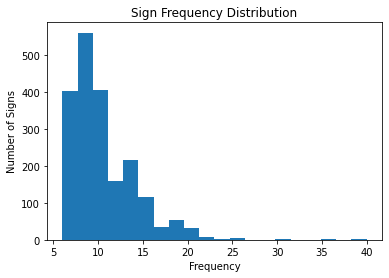

In [5]:
# Get the sign labels and frequencies
labels = [d['gloss'] for d in data]
frequencies = [len(d['instances']) for d in data]

# Plot the histogram
plt.hist(frequencies, bins=20)
plt.xlabel('Frequency')
plt.ylabel('Number of Signs')
plt.title('Sign Frequency Distribution')
plt.show()

Let's take a look at one of the videos, you can use the function **get_video_path** and **read_video** from **problem.py**. The first function gives you the path of the first video of a given word, and the second plot you images from that video. 

#

In [18]:

import matplotlib.pyplot as plt
import numpy as np

from problem import read_video, get_video_path

path_to_video = get_video_path('hello', data)
video = read_video(path_to_video)


len(video)
def plot_video_frames(video):
    num_frames = video.shape[0]
    num_cols = min(10, num_frames)
    fig, axes = plt.subplots(1, num_cols, figsize=(200, 100))
    
    for i in range(num_cols):
        frame_idx = i*int(num_frames/num_cols)
        frame = video[frame_idx]
        axes[i].imshow(frame)
        axes[i].axis('off')
            
    plt.show()


plot_video_frames(video)


OpenCV: Couldn't read video stream from file "data/raw_videos/27171.mp4"


ValueError: Number of columns must be a positive integer, not 0

<Figure size 14400x7200 with 0 Axes>

# 5. Submission

for d in data: